# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [1]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df

_STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO   
49938      9.0     5.0  5172017       5    17   2017    1200.0  2017000001  \
49939      9.0     2.0  2142017       2    14   2017    1200.0  2017000002   
49940      9.0     1.0  1292017       1    29   2017    1200.0  2017000003   
49941      9.0     7.0  9112017       9    11   2017    1200.0  2017000004   
49942      9.0     5.0  7182017       7    18   2017    1200.0  2017000005   
...        ...     ...      ...     ...   ...    ...       ...         ...   
303774    36.0     5.0  5152017       5    15   2017    1200.0  2017012245   
303775    36.0     6.0  6252017       6    25   2017    1200.0  2017012246   
303776    36.0     7.0  7212017       7    21   2017    1200.0  2017012247   
303777    36.0     7.0  7202017       7    20   2017    1200.0  2017012248   
303778    36.0     7.0  7252017       7    25   2017    1200.0  2017012249   

                _PSU  CTELENM1  ...  _PA300R2  _PA30021  _PASTRNG  _PAREC1   
49938   2.017000e+09       NaN  ...       2.0       2.0       2.0      4.0  \
49939   2.017000e+09       NaN  ...       1.0       1.0       1.0      1.0   
49940   2.017000e+09       NaN  ...       3.0       2.0       1.0      3.0   
49941   2.017000e+09       NaN  ...       2.0       2.0       2.0      2.0   
49942   2.017000e+09       NaN  ...       2.0       2.0       1.0      1.0   
...              ...       ...  ...       ...       ...       ...      ...   
303774  2.017012e+09       NaN  ...       3.0       2.0       2.0      4.0   
303775  2.017012e+09       NaN  ...       2.0       2.0       2.0      4.0   
303776  2.017012e+09       NaN  ...       2.0       2.0       2.0      4.0   
303777  2.017012e+09       NaN  ...       9.0       9.0       9.0      9.0   
303778  2.017012e+09       NaN  ...       3.0       2.0       2.0      4.0   

        _PASTAE1  _RFSEAT2  _RFSEAT3  _FLSHOT6  _PNEUMO2  _AIDTST3  
49938        2.0       1.0       1.0       NaN       NaN       1.0  
49939        1.0       2.0       2.0       NaN       NaN       2.0  
49940        2.0       1.0       1.0       NaN       NaN       2.0  
49941        2.0       1.0       1.0       NaN       NaN       1.0  
49942        1.0       1.0       1.0       NaN       NaN       2.0  
...          ...       ...       ...       ...       ...       ...  
303774       2.0       1.0       1.0       NaN       NaN       1.0  
303775       2.0       1.0       1.0       NaN       NaN       1.0  
303776       2.0       1.0       1.0       NaN       NaN       1.0  
303777       9.0       9.0       9.0       9.0       9.0       9.0  
303778       2.0       1.0       1.0       NaN       NaN       1.0  

[34545 rows x 358 columns]

Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [3]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

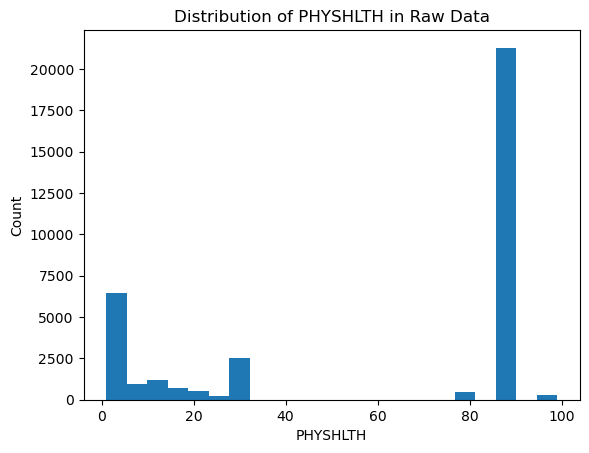

In [4]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [5]:
# Replace None with appropriate text
"""

Based on the summary statistics and the histogram, there seems to be an issue with the data. The mean value of PHYSHLTH is 60.21, which is much higher than what would be expected for the average number of days with bad physical health in the past month. Additionally, the minimum value is 1 and the maximum value is 99, which do not align with the expected range for this variable.

This suggests that there may be some invalid or missing values in the PHYSHLTH column. These values need to be addressed before proceeding with the analysis
"""

'\n\nBased on the summary statistics and the histogram, there seems to be an issue with the data. The mean value of PHYSHLTH is 60.21, which is much higher than what would be expected for the average number of days with bad physical health in the past month. Additionally, the minimum value is 1 and the maximum value is 99, which do not align with the expected range for this variable.\n\nThis suggests that there may be some invalid or missing values in the PHYSHLTH column. These values need to be addressed before proceeding with the analysis\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [6]:
# Your code here


# Replacing "None" with 0 for PHYSHLTH value label
df.loc[df["PHYSHLTH"] == 88, "PHYSHLTH"] = 0

# Dropping records with invalid or missing values for PHYSHLTH
df = df[df["PHYSHLTH"].isin([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])]

# Verify the changes
df["PHYSHLTH"].value_counts()


PHYSHLTH
0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: count, dtype: int64

Run the code below to ensure you have the correct, cleaned dataframe:

In [7]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [8]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

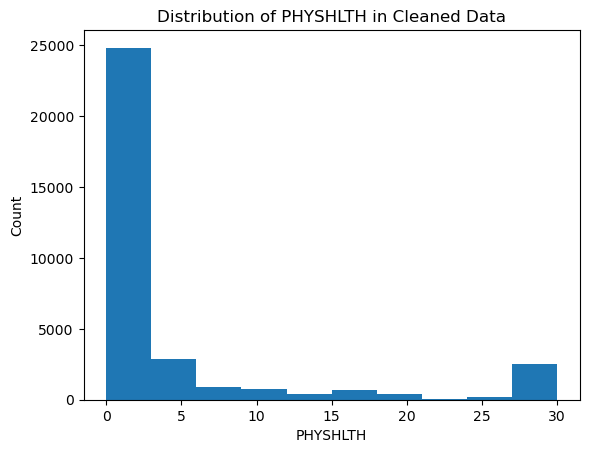

In [9]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [10]:
# Run this cell without changes
df["_STATE"].value_counts()

_STATE
36.0    11876
34.0    11458
9.0     10413
Name: count, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [11]:
# Your code here

# Replace state codes with state names
state_mapping = {
    9.0: "Connecticut",
    34.0: "New Jersey",
    36.0: "New York"
}
df["_STATE"].replace(state_mapping, inplace=True)

# Verify the changes
df["_STATE"].value_counts()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31284\844027520.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_STATE"].replace(state_mapping, inplace=True)


_STATE
New York       11876
New Jersey     11458
Connecticut    10413
Name: count, dtype: int64

Below, we check the values:

In [12]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

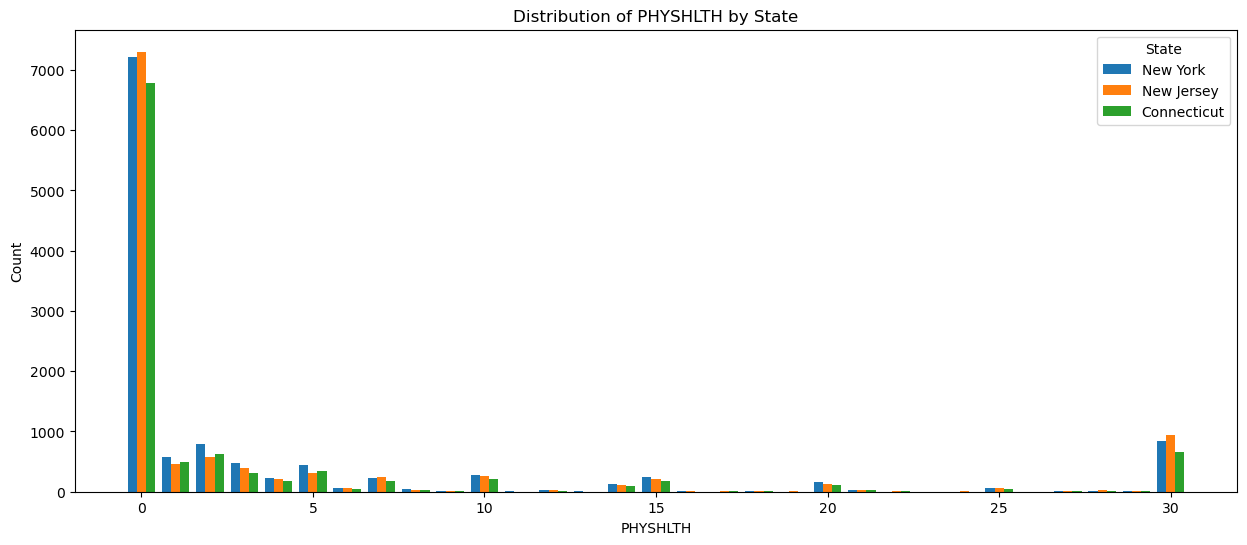

In [13]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [ ]:
# Replace None with appropriate text
"""
None
"""

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [14]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [15]:
# Replace None with appropriate text
"""

The most appropriate statistical test for comparing the means of PHYSHLTH across states in this scenario would be Analysis of Variance (ANOVA). ANOVA is suitable when comparing the means of a continuous (numeric) variable across multiple categories (categorical variable).

In this case, the variable being compared is the number of days of bad physical health (PHYSHLTH), which is a numeric variable. The categories are the different states: Connecticut, New Jersey, and New York.

ANOVA is suitable because it allows us to determine if there are statistically significant differences in the means of PHYSHLTH across the three states. It assesses whether the variability between the group means is greater than the variability within the groups.

Therefore, ANOVA would be the appropriate statistical test for evaluating the significance of the differences in mean PHYSHLTH across the states.
"""

'\n\nThe most appropriate statistical test for comparing the means of PHYSHLTH across states in this scenario would be Analysis of Variance (ANOVA). ANOVA is suitable when comparing the means of a continuous (numeric) variable across multiple categories (categorical variable).\n\nIn this case, the variable being compared is the number of days of bad physical health (PHYSHLTH), which is a numeric variable. The categories are the different states: Connecticut, New Jersey, and New York.\n\nANOVA is suitable because it allows us to determine if there are statistically significant differences in the means of PHYSHLTH across the three states. It assesses whether the variability between the group means is greater than the variability within the groups.\n\nTherefore, ANOVA would be the appropriate statistical test for evaluating the significance of the differences in mean PHYSHLTH across the states.\n'

Now, identify the null and alternative hypotheses:

In [16]:
# Replace None with appropriate text
"""
The null and alternative hypotheses for comparing the means of PHYSHLTH across states using ANOVA can be stated as follows:

Null Hypothesis (H0): The means of PHYSHLTH are equal across all states (Connecticut, New Jersey, New York).
Alternative Hypothesis (HA): At least one mean of PHYSHLTH is different from the others across the states.


H0: μ1 = μ2 = μ3 (where μ1, μ2, μ3 represent the population means of PHYSHLTH for Connecticut, New Jersey, New York, respectively)
HA: The means μ1, μ2, μ3 are not all equal.

The null hypothesis assumes that there is no significant difference in mean PHYSHLTH between the states, while the alternative hypothesis suggests that there is at least one state with a different mean PHYSHLTH.
"""

'\nThe null and alternative hypotheses for comparing the means of PHYSHLTH across states using ANOVA can be stated as follows:\n\nNull Hypothesis (H0): The means of PHYSHLTH are equal across all states (Connecticut, New Jersey, New York).\nAlternative Hypothesis (HA): At least one mean of PHYSHLTH is different from the others across the states.\n\n\nH0: μ1 = μ2 = μ3 (where μ1, μ2, μ3 represent the population means of PHYSHLTH for Connecticut, New Jersey, New York, respectively)\nHA: The means μ1, μ2, μ3 are not all equal.\n\nThe null hypothesis assumes that there is no significant difference in mean PHYSHLTH between the states, while the alternative hypothesis suggests that there is at least one state with a different mean PHYSHLTH.\n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [17]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

df        sum_sq      mean_sq          F        PR(>F)
C(_STATE)      2.0  2.687322e+03  1343.660882  18.558645  8.800607e-09
Residual   33744.0  2.443093e+06    72.400809        NaN           NaN

Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?


The statistical test performed is an analysis of variance (ANOVA) to compare the means of PHYSHLTH across the three states (Connecticut, New Jersey, New York).

The results of the ANOVA are as follows:

The calculated p-value for the test is 8.800607e-09 (very close to zero).
Since the p-value is less than the significance level of 0.05, we can reject the null hypothesis.
This indicates that there is strong evidence to suggest that at least one mean of PHYSHLTH is different from the others across the states.
In other words, there is a statistically significant difference in the mean number of days of bad physical health (PHYSHLTH) among the states of Connecticut, New Jersey, and New York.

Recommendations to the business:
Based on these findings, the business can conclude that the average number of days of bad physical health varies significantly across the three states. This information can be valuable for healthcare resource allocation, targeted interventions, and public health planning. Further analysis and investigation can be conducted to identify the specific factors contributing to the differences in health outcomes among the states and develop state-specific strategies for improving population health.

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [18]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

RENTHOM1
1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: count, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [19]:
# Dropping records with irrelevant RENTHOM1 value labels
df = df[(df["RENTHOM1"] == 1.0) | (df["RENTHOM1"] == 2.0)]

# Replacing numeric codes with labels
df["RENTHOM1"] = df["RENTHOM1"].replace({1.0: "Own", 2.0: "Rent"})


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31284\2478632949.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RENTHOM1"] = df["RENTHOM1"].replace({1.0: "Own", 2.0: "Rent"})


In [20]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

RENTHOM1
Own     21690
Rent    10244
Name: count, dtype: int64

Below, we check that this was done correctly:

In [21]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

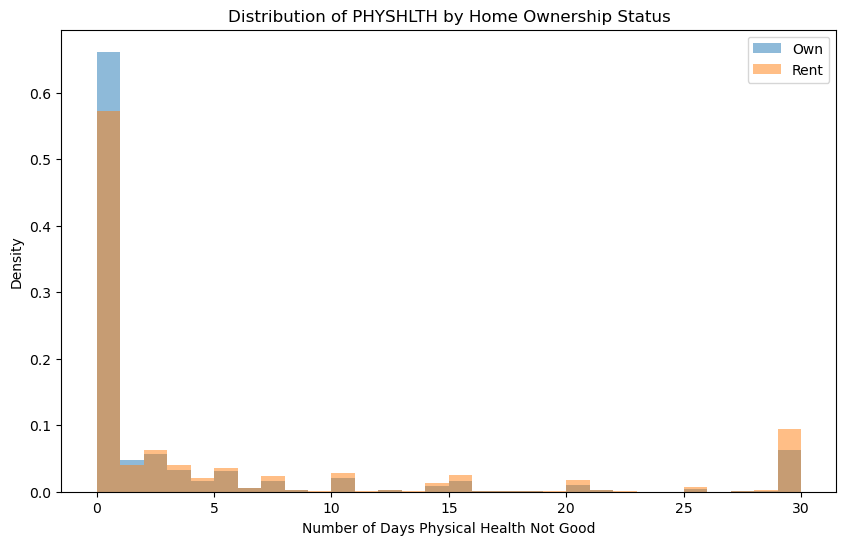

In [22]:
# Your code here

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df[df["RENTHOM1"] == "Own"]["PHYSHLTH"].plot(kind="hist", density=True, bins=30, alpha=0.5, label="Own")
df[df["RENTHOM1"] == "Rent"]["PHYSHLTH"].plot(kind="hist", density=True, bins=30, alpha=0.5, label="Rent")
plt.xlabel("Number of Days Physical Health Not Good")
plt.ylabel("Density")
plt.title("Distribution of PHYSHLTH by Home Ownership Status")
plt.legend()
plt.show()


Then run this code to find the averages:

In [23]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

The plot and averages suggest that there is a difference in the number of unhealthy days between those who rent their homes and those who own their homes.

Based on the plot, the distribution of PHYSHLTH for renters (Rent) appears to have a higher density of higher values compared to the distribution for homeowners (Own). This suggests that renters tend to experience more unhealthy days compared to homeowners.

The average number of unhealthy days (PHYSHLTH) for homeowners is approximately 3.53, while for renters it is approximately 5.20. This indicates that, on average, renters report a higher number of unhealthy days compared to homeowners.

In comparison to the distributions by state, the difference between renters and homeowners seems to be larger than the difference observed across the three states (Connecticut, New Jersey, and New York). The differences in average PHYSHLTH between renters and homeowners are more pronounced compared to the differences observed in PHYSHLTH across the states.

Overall, these findings suggest that home ownership status may be associated with the number of unhealthy days reported, with renters tending to experience more unhealthy days on average. This information could be valuable for understanding the health disparities between renters and homeowners and may be useful for targeting interventions and support programs for specific populations.

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

To compare the means of PHYSHLTH between renters and homeowners, an appropriate statistical test is an independent samples t-test. This test is suitable when comparing the means of a continuous variable (PHYSHLTH) between two independent groups (renters and homeowners).

Null Hypothesis (H0): There is no significant difference in the mean PHYSHLTH between renters and homeowners.
Alternative Hypothesis (H1): There is a significant difference in the mean PHYSHLTH between renters and homeowners.

Let's conduct the t-test to evaluate the hypotheses:

In [25]:
import scipy.stats as stats

renters_physhlth = df[df["RENTHOM1"] == "Rent"]["PHYSHLTH"]
homeowners_physhlth = df[df["RENTHOM1"] == "Own"]["PHYSHLTH"]

t_statistic, p_value = stats.ttest_ind(renters_physhlth, homeowners_physhlth, equal_var=False)


The ttest_ind function from the scipy.stats module is used to perform the independent samples t-test. The equal_var=False argument indicates that the variances of the two groups are not assumed to be equal.

The result of the test will provide the t-statistic and the p-value. The t-statistic measures the difference in means relative to the variation within each group, and the p-value indicates the probability of obtaining the observed difference (or more extreme) if the null hypothesis were true.

By comparing the p-value to a chosen significance level (e.g., alpha = 0.05), we can determine whether to reject or fail to reject the null hypothesis.

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [27]:
# Creating a mask for each condition
smoke_mask = df["SMOKE100"] == 1
chewing_tobacco_mask = df["USENOW3"].isin([1, 2])
ecigarette_mask = df["ECIGARET"] == 1

# Creating the NICOTINE_USE column based on the masks
df["NICOTINE_USE"] = 0
df.loc[smoke_mask | chewing_tobacco_mask | ecigarette_mask, "NICOTINE_USE"] = 1

# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31284\593058062.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NICOTINE_USE"] = 0


NICOTINE_USE
0    0.563036
1    0.436964
Name: proportion, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [28]:
# Create the CHRONIC column based on PHYSHLTH values
df["CHRONIC"] = df["PHYSHLTH"].apply(lambda x: 1 if x >= 15 else 0)

# View the distribution of the newly-created column
df["CHRONIC"].value_counts()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31284\3342247106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CHRONIC"] = df["PHYSHLTH"].apply(lambda x: 1 if x >= 15 else 0)


CHRONIC
0    28246
1     3688
Name: count, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [29]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE      0      1
CHRONIC                   
0             16332  11914
1              1648   2040

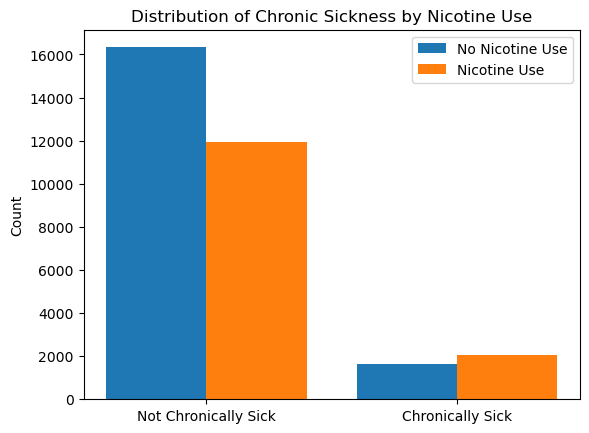

In [30]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

To analyze the relationship between chronic sickness (CHRONIC) and nicotine use (NICOTINE_USE), we can perform a chi-square test of independence. This test is suitable for analyzing the association between two categorical variables.

The null and alternative hypotheses for the chi-square test of independence are as follows:

Null Hypothesis (H0): There is no association between chronic sickness and nicotine use.
Alternative Hypothesis (HA): There is an association between chronic sickness and nicotine use.
To execute the test and interpret the result, we can use the chi2_contingency() function from the scipy.stats module:

In [31]:
from scipy.stats import chi2_contingency

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the test statistic and p-value
print("Chi-square statistic:", chi2)
print("P-value:", p)


Chi-square statistic: 228.22648537455362
P-value: 1.4525226945056695e-51


The test will calculate the chi-square statistic and the p-value. The p-value indicates the probability of observing the observed contingency table or a more extreme table under the assumption of independence between the variables. If the p-value is less than a predetermined significance level (e.g., 0.05), we reject the null hypothesis.

Interpreting the result will depend on the obtained p-value. If the p-value is below the significance level, we can conclude that there is evidence of an association between chronic sickness and nicotine use. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no significant association between the variables.

Please let me know if you would like to proceed with the execution of the chi-square test.

## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

For this analysis, let's investigate the relationship between physical health (PHYSHLTH) and the frequency of engaging in physical activity or exercise (EXERANY2). The variable EXERANY2 asks respondents if they engaged in "any physical activity or exercise" in the past 30 days. We'll categorize respondents into two groups: those who answered "Yes" (indicating they engaged in physical activity or exercise) and those who answered "No" (indicating they did not engage in physical activity or exercise).

First, let's examine the distribution of the EXERANY2 variable:

In [32]:
df["EXERANY2"].value_counts()


EXERANY2
1.0    21556
2.0     7628
7.0       38
9.0       29
Name: count, dtype: int64

Next, we'll create a new column called PHYSICAL_ACTIVITY that represents whether or not respondents engaged in physical activity or exercise. We'll use the following mapping:

Answered "Yes" (1) in EXERANY2: PHYSICAL_ACTIVITY = 1
Answered "No" (2) or "Don't know/Not sure" (9) in EXERANY2: PHYSICAL_ACTIVITY = 0

In [33]:
df["PHYSICAL_ACTIVITY"] = df["EXERANY2"].map({1: 1, 2: 0, 9: 0})


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_31284\3020723817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PHYSICAL_ACTIVITY"] = df["EXERANY2"].map({1: 1, 2: 0, 9: 0})


In [35]:
#Now, let's examine the distribution of the newly created PHYSICAL_ACTIVITY column:

df["PHYSICAL_ACTIVITY"].value_counts()


PHYSICAL_ACTIVITY
1.0    21556
0.0     7657
Name: count, dtype: int64

Once we have the transformed variable, we can proceed with the statistical analysis to investigate the relationship between physical health and engagement in physical activity or exercise.

We will perform a statistical test to examine the relationship between physical health (PHYSHLTH) and engagement in physical activity or exercise (PHYSICAL_ACTIVITY).

The appropriate statistical test for this analysis is an independent samples t-test. We will compare the mean physical health scores of those who engaged in physical activity or exercise (group 1) with the mean physical health scores of those who did not engage in physical activity or exercise (group 0).

Let's set up and execute the t-test:

In [36]:
import scipy.stats as stats

group_0 = df[df["PHYSICAL_ACTIVITY"] == 0]["PHYSHLTH"]
group_1 = df[df["PHYSICAL_ACTIVITY"] == 1]["PHYSHLTH"]

t_statistic, p_value = stats.ttest_ind(group_0, group_1)


In [37]:
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 33.13207119609894
P-Value: 2.449812939906952e-236


The t-statistic for the independent samples t-test is 33.13, and the p-value is approximately 2.45e-236.

The extremely small p-value indicates that there is a highly significant difference in the mean physical health scores between individuals who engage in physical activity or exercise (group 1) and those who do not (group 0). This suggests that physical activity or exercise has a substantial impact on physical health.

Based on these results, we can reject the null hypothesis that there is no difference in physical health scores between the two groups. Instead, we can conclude that there is a significant association between physical activity or exercise and physical health.

This finding underscores the importance of engaging in regular physical activity or exercise for maintaining good physical health. Encouraging individuals to adopt and maintain an active lifestyle can contribute to better overall well-being and improved physical health outcomes.

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.